In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Sales_add.csv')
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [4]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
from scipy import stats
stats.ttest_rel(df['Sales_After_digital_add(in $)'], df['Sales_before_digital_add(in $)'],alternative='greater')

Ttest_relResult(statistic=12.09070525287017, pvalue=3.168333502287889e-11)

In [6]:
dfv={'Digital_Add':['before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','before','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after','after'],'Sales':[132921,149559,146278,152167,159525,137163,130625,131140,171259,141956,159339,178939,145062,151514,147463,177195,140862,167996,132135,152493,147425,130263,270390,223334,244243,231808,258402,256948,222106,230637,226261,193735,203175,276279,205180,253131,229336,187305,234908,191517,227040,212579,263388,243020]}
dfv=pd.DataFrame(dfv)
dfv.head()

,Digital_Add,Sales
0,before,132921
1,before,149559
2,before,146278
3,before,152167
4,before,159525


<AxesSubplot:xlabel='Digital_Add', ylabel='Sales'>

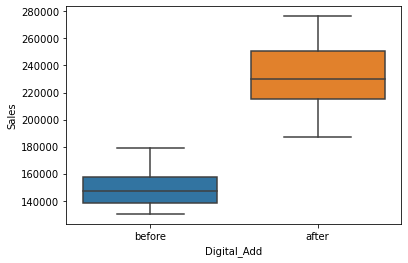

In [8]:
import seaborn as sns
sns.boxplot(x='Digital_Add',y='Sales',data=dfv)

In [9]:
df['Region'].value_counts() 

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [10]:
df['Manager'].value_counts() 

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [11]:
crosstab=pd.crosstab(df.Region,df.Manager) # observed frequencies
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [12]:
import scipy.stats as stats
stats.chi2_contingency(crosstab)

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [13]:
import scipy
Table_chi=scipy.stats.chi2.ppf(1-.05, df=4) # Finding Table value of chi-square
Table_chi

9.487729036781154

<AxesSubplot:xlabel='Manager', ylabel='count'>

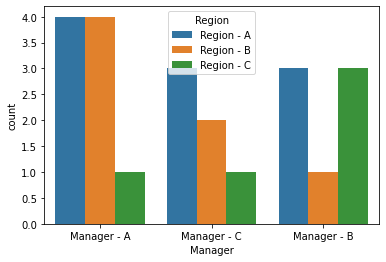

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Manager',hue='Region',data=df)

<AxesSubplot:xlabel='Manager', ylabel='Region'>

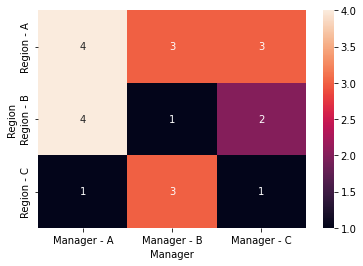

In [15]:
sns.heatmap(crosstab,annot=True)